In [1]:
## Preparing the data

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, glob
from matplotlib import cm
import psychopy
from psychopy.tools.filetools import fromFile

/Users/egor/Library/Enthought/Canopy_32bit/User/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


Loading the data:

In [3]:
%matplotlib inline
plt.style.use('dark_background')
expName = 'mc2_tgT-mcBv'
#condName = 'mc2_tgT-mcBv_peri'
dataDir = os.path.abspath(os.path.join(os.getcwd(), '..', '..', 'data/', expName + '*'))
print dataDir
allSubjDirs = glob.glob(dataDir + '/' + expName + '*')
print allSubjDirs
stairs = pd.DataFrame()
# matrices for intensities, responses, and means of reversals:
intns, resps, thisRevs, revMeans = [],[],[],[] 
orderInfo = pd.DataFrame() # subj, session, and stair info for ordering intns & resps

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv*
['/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p0_s2_2017-01-26_1545', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p11_s1_2017-02-08_1635', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p3_s1_2017-01-31_1514', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p4_s2_2017-02-02_1303', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p5_s4_2017-02-07_1220', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p0_s1_2017-01-31_1052', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p3_s2_2017-02-02_1133', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p5_s2_2017-02-07_1008', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p6_s1_2017-02-04_1514', '/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-p_p0_s1_2017-01-31_1225', '/Users/egor

In [4]:
for subjDir in allSubjDirs:
    print subjDir
    subjStairsPath = glob.glob(subjDir + '/' + expName + '*.csv')[0]
    subjStairs = pd.read_csv(subjStairsPath)
    stairs = stairs.append(subjStairs)
    #print subjStairs
    for subjStairLabel in subjStairs['stairLabel']:
        #print subjStairLabel #thisSubjStair['label']
        thisStair = fromFile(subjDir + '/' + subjStairLabel + '.psydat')
        intns.append(thisStair.intensities)
        resps.append(thisStair.data)
        theseRevIntns = thisStair.reversalIntensities #detectRevs(thisStair)
        #print np.round(theseRevIntns,1)
        revMeans.append([np.average(thisStair.reversalIntensities[-4:]),
                         np.average(thisStair.reversalIntensities[-6:]),
                         np.average(thisStair.reversalIntensities[-8:])])
        orderInfo = orderInfo.append(pd.DataFrame({
                    'participant': subjStairs.participant[0],
                    'mcBv': thisStair.extraInfo['mcBv'],
                    'targTpeak': thisStair.extraInfo['targTpeak'],
                    'targXoff2': thisStair.extraInfo['targXoff2'],
                    'targV': thisStair.extraInfo['targV'],
                    'stairStart': [thisStair.extraInfo['startContr']]
                    }))
                    #'sessionLabel': os.path.basename(subjStairsPath)[:-20],
                    #'stairLabel': [subjStairLabel]
        #print np.round(thisStair.intensities,2)
        #print thisStair.data # responses (correct/incorrect)
        #print thisStair.extraInfo

/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p0_s2_2017-01-26_1545
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p11_s1_2017-02-08_1635
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p3_s1_2017-01-31_1514
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p4_s2_2017-02-02_1303
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_cent_p5_s4_2017-02-07_1220
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p0_s1_2017-01-31_1052
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p3_s2_2017-02-02_1133
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p5_s2_2017-02-07_1008
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-c_p6_s1_2017-02-04_1514
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-p_p0_s1_2017-01-31_1225
/Users/egor/Dropbox/Projects/mc/data/mc2_tgT-mcBv/mc2_tgT-mcBv_mtn-p_p3_s4_2017-02-07_1306
/Us

In [5]:
stairs['condLabel'] = 'mcBv-' + stairs.mcBv.astype(str) + '_' + \
                      'tgEcc-' + stairs.targXoff2.astype(str) + '_' + \
                      'tgV-' + stairs.targV.astype(str) + '_' + \
                      'tgT-' + stairs.targTpeak.astype(str)
print stairs.shape
print stairs.columns
stairs.head(5)

(306, 30)
Index([u'dom', u'expName', u'expPara', u'fixCross', u'mcBsf', u'mcBv',
       u'mcPeriFade', u'mcPeriGap', u'mcSf', u'mcSz', u'meanRev6', u'nRevs',
       u'participant', u'session', u'stairLabel', u'stairMean', u'stairStart',
       u'targOri1', u'targOri2', u'targSf', u'targSz', u'targTpeak',
       u'targTtot', u'targV', u'targXoff1', u'targXoff2', u'targYoff', u'time',
       u'trialT', u'condLabel'],
      dtype='object')


,dom,expName,expPara,fixCross,mcBsf,mcBv,mcPeriFade,mcPeriGap,mcSf,mcSz,...,targSz,targTpeak,targTtot,targV,targXoff1,targXoff2,targYoff,time,trialT,condLabel
0,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,0.60,16,112,0.1,256,...,32,1.0,1,0.0,-48,48,0,2017-01-26_1545,2,mcBv-0.6_tgEcc-48_tgV-0.0_tgT-1.0
1,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,0.01,16,112,0.1,256,...,32,1.0,1,0.0,-48,48,0,2017-01-26_1545,2,mcBv-0.01_tgEcc-48_tgV-0.0_tgT-1.0
2,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,9.60,16,112,0.1,256,...,32,1.0,1,0.0,-48,48,0,2017-01-26_1545,2,mcBv-9.6_tgEcc-48_tgV-0.0_tgT-1.0
3,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,0.01,16,112,0.1,256,...,32,1.5,1,0.0,-48,48,0,2017-01-26_1545,2,mcBv-0.01_tgEcc-48_tgV-0.0_tgT-1.5
4,NaN,mc2_tgT-mcBv_cent,NaN,1,0.05,9.60,16,112,0.1,256,...,32,0.5,1,0.0,-48,48,0,2017-01-26_1545,2,mcBv-9.6_tgEcc-48_tgV-0.0_tgT-0.5


In [6]:
print np.shape(resps)
print np.shape(intns)
print np.shape(revMeans)
orderInfo = orderInfo.reset_index(drop=True)
print orderInfo.shape
orderInfo.head(5)

(306,)
(306,)
(306, 3)
(306, 6)


,mcBv,participant,stairStart,targTpeak,targV,targXoff2
0,0.60,0,-3,1.0,0.0,48
1,0.01,0,-3,1.0,0.0,48
2,9.60,0,0,1.0,0.0,48
3,0.01,0,0,1.5,0.0,48
4,9.60,0,-3,0.5,0.0,48


Combining the trial data into a tall df.

In [7]:
nStairs = np.shape(resps)[0]
nTrials = []
for thisResp in resps: nTrials.append(np.shape(thisResp)[0])
nTrialsMax = np.max(nTrials)
allResps, allIntns = [], []
for i in range(nStairs):
    thisResp, thisIntn = resps[i], intns[i]
    x, y = np.empty((nTrialsMax,)), np.empty((nTrialsMax,))
    x[:], y[:] = np.NAN, np.NAN
    x[0:nTrials[i]] = np.array(thisResp)
    y[0:nTrials[i]] = np.array(thisIntn)
    allResps.append(x)
    allIntns.append(y)
orderInfoRepd = orderInfo.loc[np.repeat(orderInfo.index.values,nTrialsMax)]
print orderInfoRepd.shape
orderInfoRepd = orderInfoRepd.reset_index(drop=True)
orderInfoRepd['trialN'] = np.tile(np.linspace(1,nTrialsMax,nTrialsMax),nStairs)
orderInfoRepd['intns'] = np.array(allIntns).flatten()
orderInfoRepd['resps'] = np.array(allResps).flatten()
trials = pd.merge(orderInfoRepd, stairs, on=['participant','mcBv','targTpeak',
                                             'targXoff2', 'targV', 'stairStart'])
trials.head(5)

(15606, 6)


,mcBv,participant,stairStart,targTpeak,targV,targXoff2,trialN,intns,resps,dom,...,targOri1,targOri2,targSf,targSz,targTtot,targXoff1,targYoff,time,trialT,condLabel
0,0.6,0,-3,1.0,0.0,48,1.0,-3.0,0.0,NaN,...,0,0,0.1,32,1,-48,0,2017-01-26_1545,2,mcBv-0.6_tgEcc-48_tgV-0.0_tgT-1.0
1,0.6,0,-3,1.0,0.0,48,2.0,-2.0,1.0,NaN,...,0,0,0.1,32,1,-48,0,2017-01-26_1545,2,mcBv-0.6_tgEcc-48_tgV-0.0_tgT-1.0
2,0.6,0,-3,1.0,0.0,48,3.0,-3.0,0.0,NaN,...,0,0,0.1,32,1,-48,0,2017-01-26_1545,2,mcBv-0.6_tgEcc-48_tgV-0.0_tgT-1.0
3,0.6,0,-3,1.0,0.0,48,4.0,-2.0,1.0,NaN,...,0,0,0.1,32,1,-48,0,2017-01-26_1545,2,mcBv-0.6_tgEcc-48_tgV-0.0_tgT-1.0
4,0.6,0,-3,1.0,0.0,48,5.0,-2.0,1.0,NaN,...,0,0,0.1,32,1,-48,0,2017-01-26_1545,2,mcBv-0.6_tgEcc-48_tgV-0.0_tgT-1.0


In [8]:
dfStatCent = trials.ix[(trials.targXoff2==48) & (trials.targV==0)]
dfStatPeri = trials.ix[(trials.targXoff2==104) & (trials.targV==0)]
dfMtnCent = trials.ix[(trials.targXoff2==48) & (trials.targV==3.5)]
dfMtnPeri = trials.ix[(trials.targXoff2==104) & (trials.targV==3.5)]

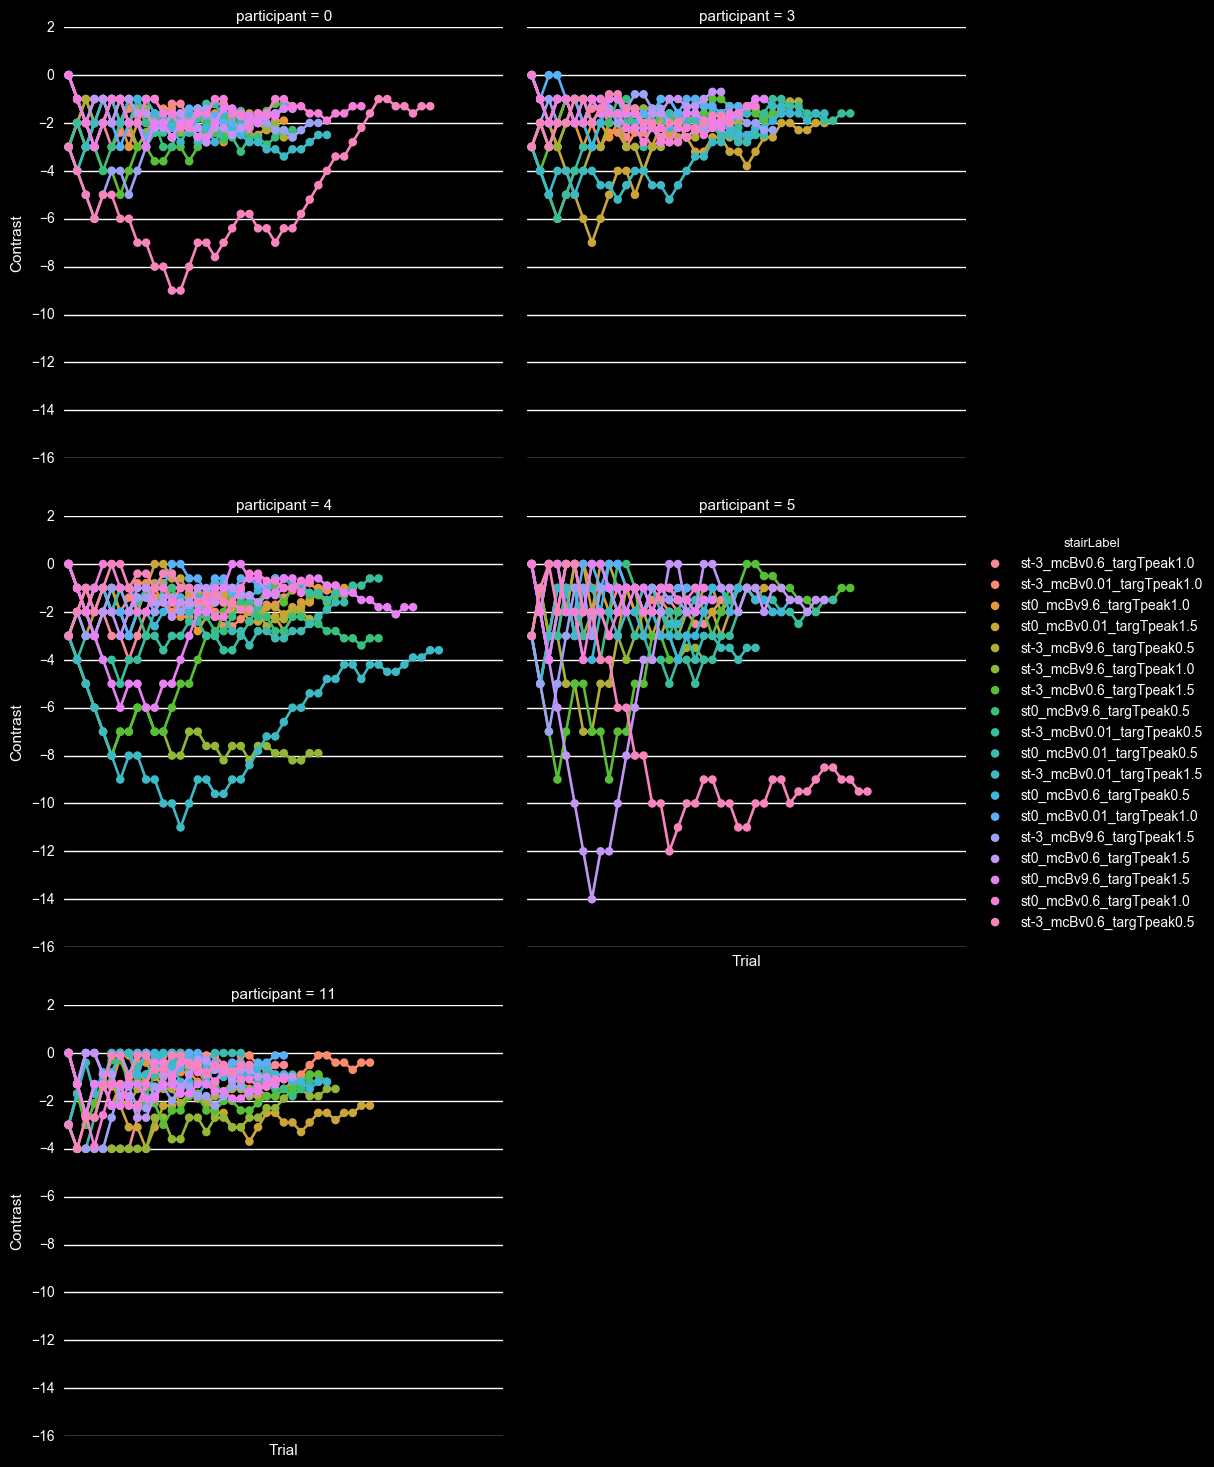

In [9]:
g = sns.factorplot(x='trialN', y='intns', hue='stairLabel', col='participant', data=dfStatCent, 
               col_wrap=2, ci=None, kind='point', size=5, scale=.6)
g.set_axis_labels('Trial','Contrast')
g.set(xticks=[])
#plt.ylim(-0.1,1.1)

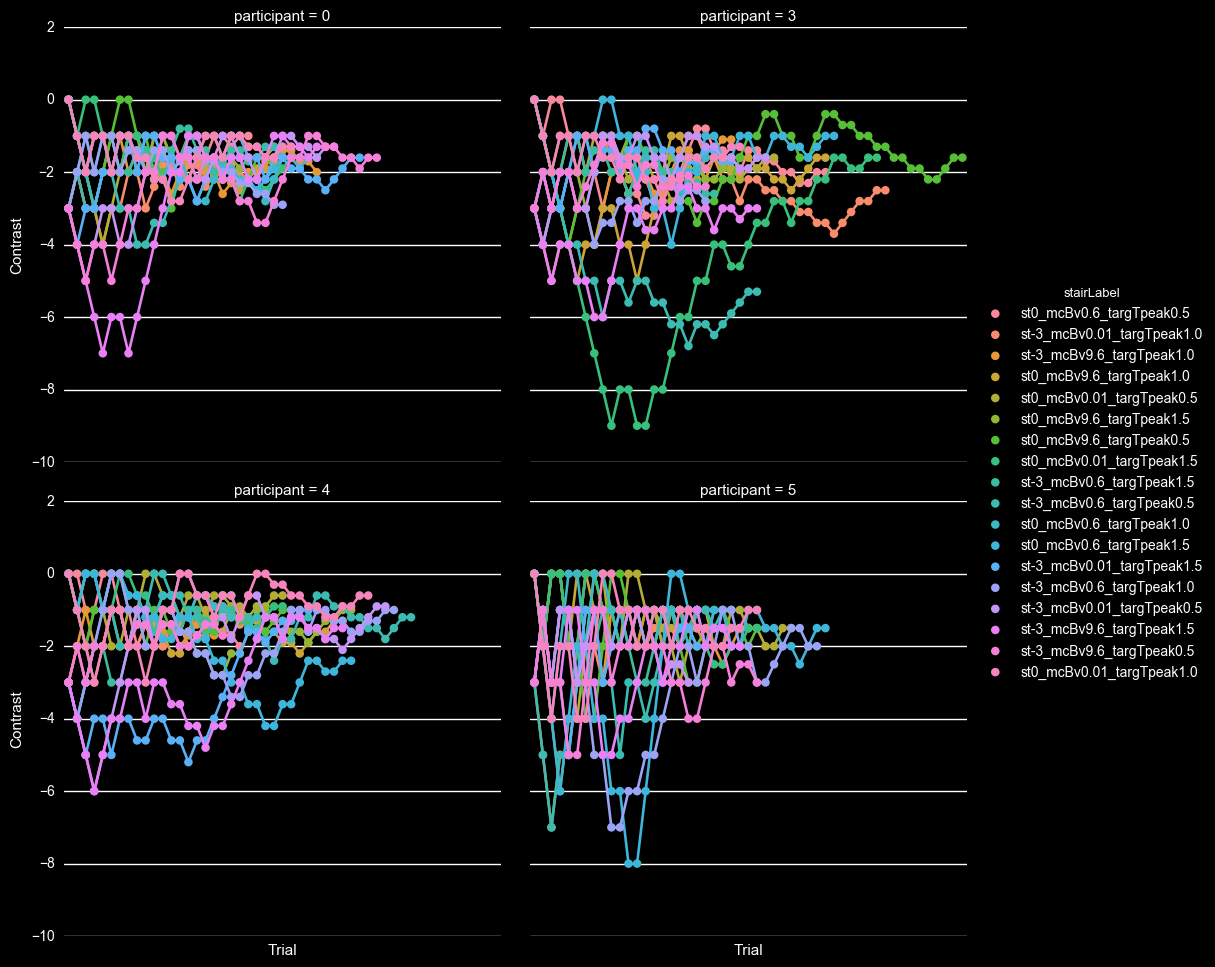

In [10]:
g = sns.factorplot(x='trialN', y='intns', hue='stairLabel', col='participant', data=dfStatPeri, 
               col_wrap=2, ci=None, kind='point', size=5, scale=.6)
g.set_axis_labels('Trial','Contrast')
g.set(xticks=[])
#plt.ylim(-0.1,1.1)

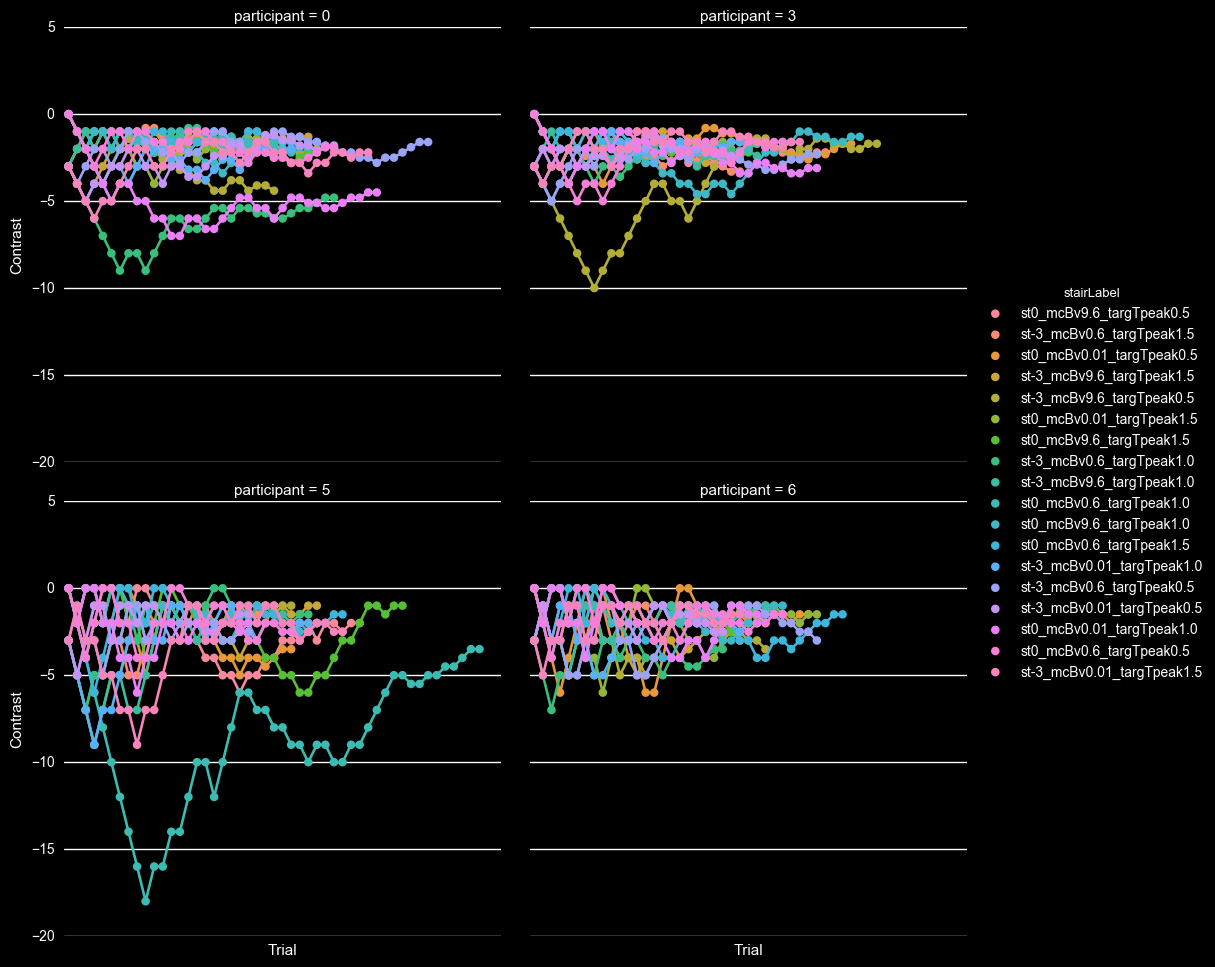

In [11]:
g = sns.factorplot(x='trialN', y='intns', hue='stairLabel', col='participant', data=dfMtnCent, 
               col_wrap=2, ci=None, kind='point', size=5, scale=.6)
g.set_axis_labels('Trial','Contrast')
g.set(xticks=[])
#plt.ylim(-0.1,1.1)

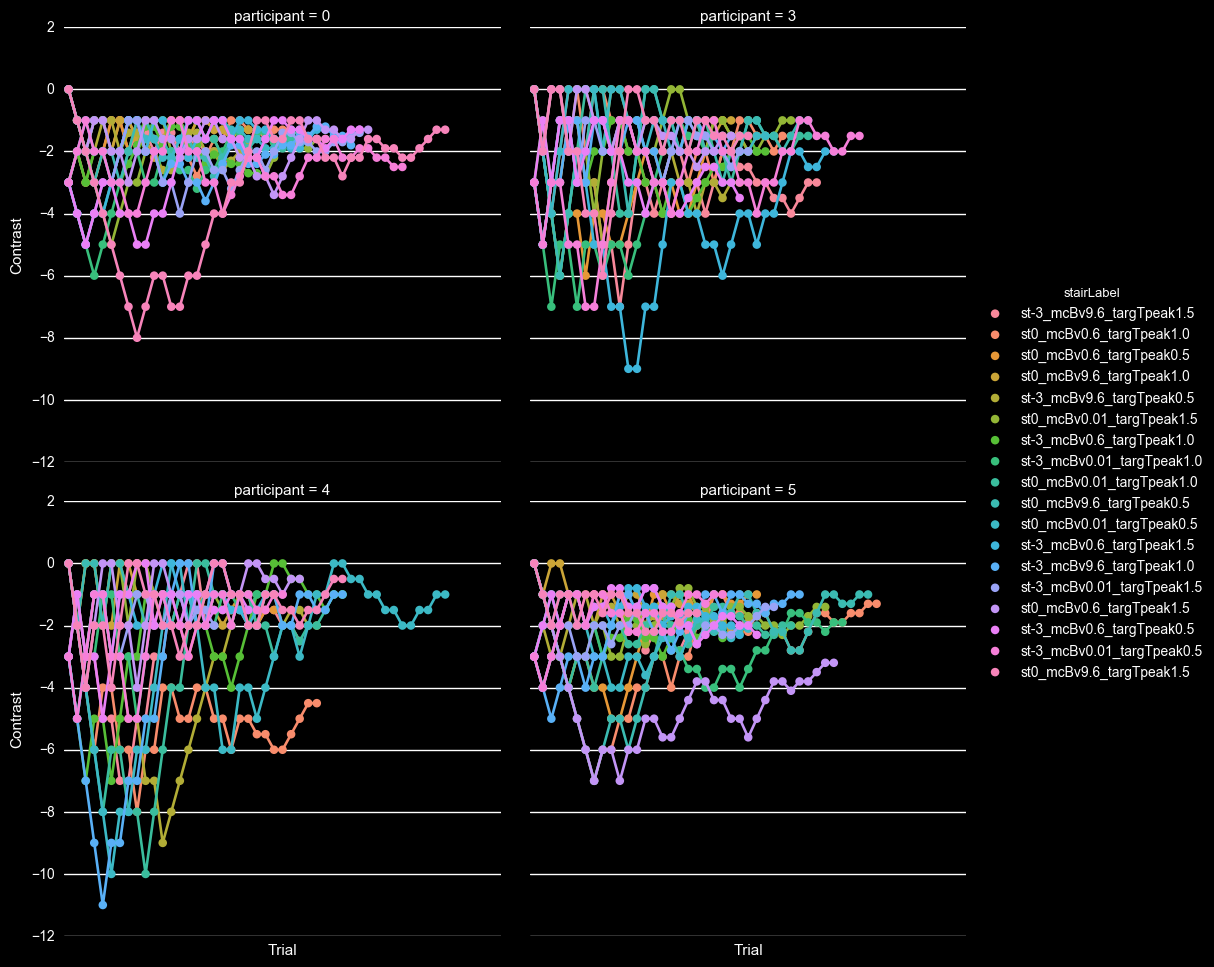

In [12]:
g = sns.factorplot(x='trialN', y='intns', hue='stairLabel', col='participant', data=dfMtnPeri, 
               col_wrap=2, ci=None, kind='point', size=5, scale=.6)
g.set_axis_labels('Trial','Contrast')
g.set(xticks=[])
#plt.ylim(-0.1,1.1)

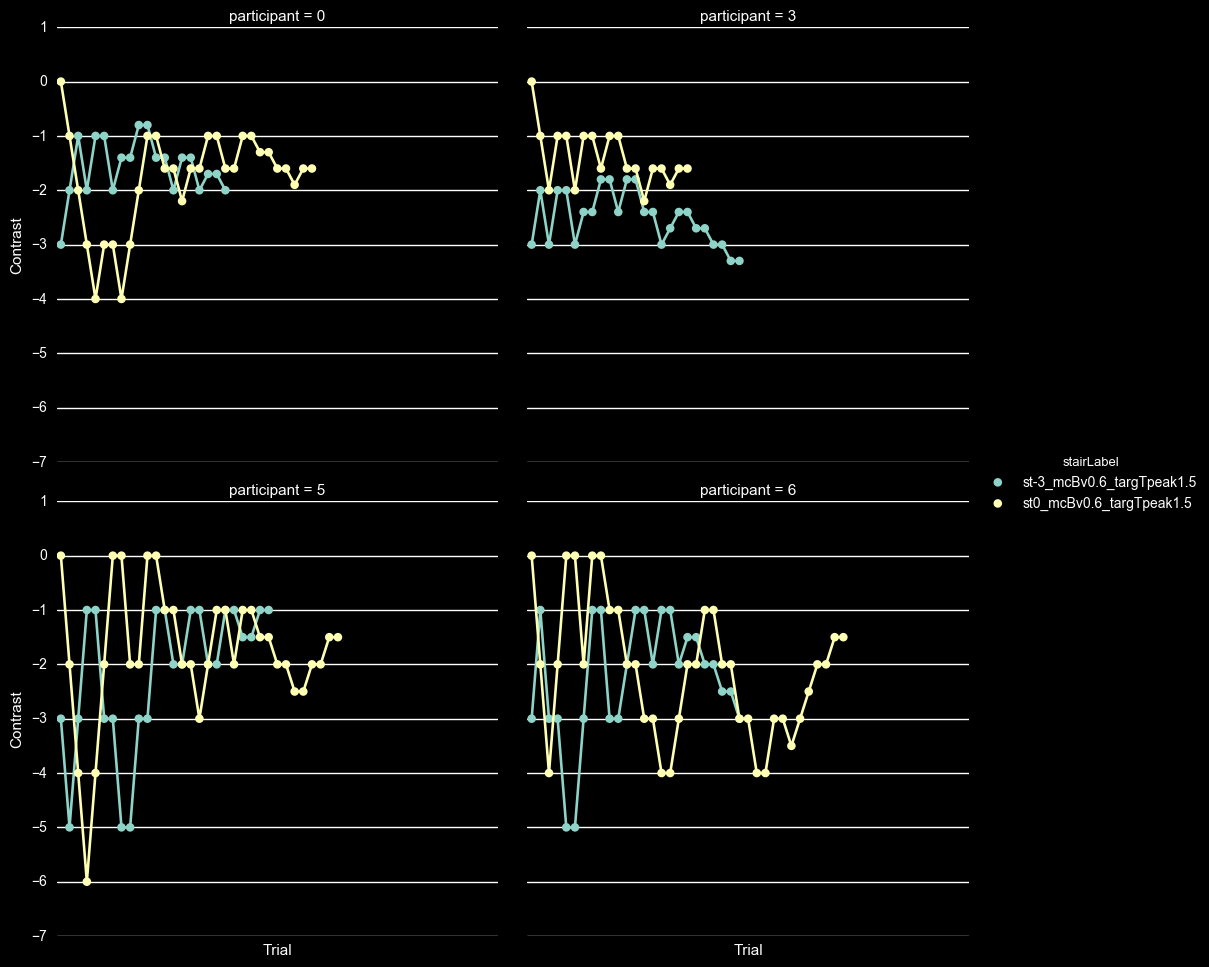

In [13]:
g = sns.factorplot(x='trialN', y='intns', hue='stairLabel', col='participant',
                   data=dfMtnCent.ix[(dfMtnCent.mcBv==0.6)&(dfMtnCent.targTpeak==1.5)], 
               col_wrap=2, ci=None, kind='point', size=5, scale=.6)
g.set_axis_labels('Trial','Contrast')
g.set(xticks=[])
#plt.ylim(-0.1,1.1)